# SQS

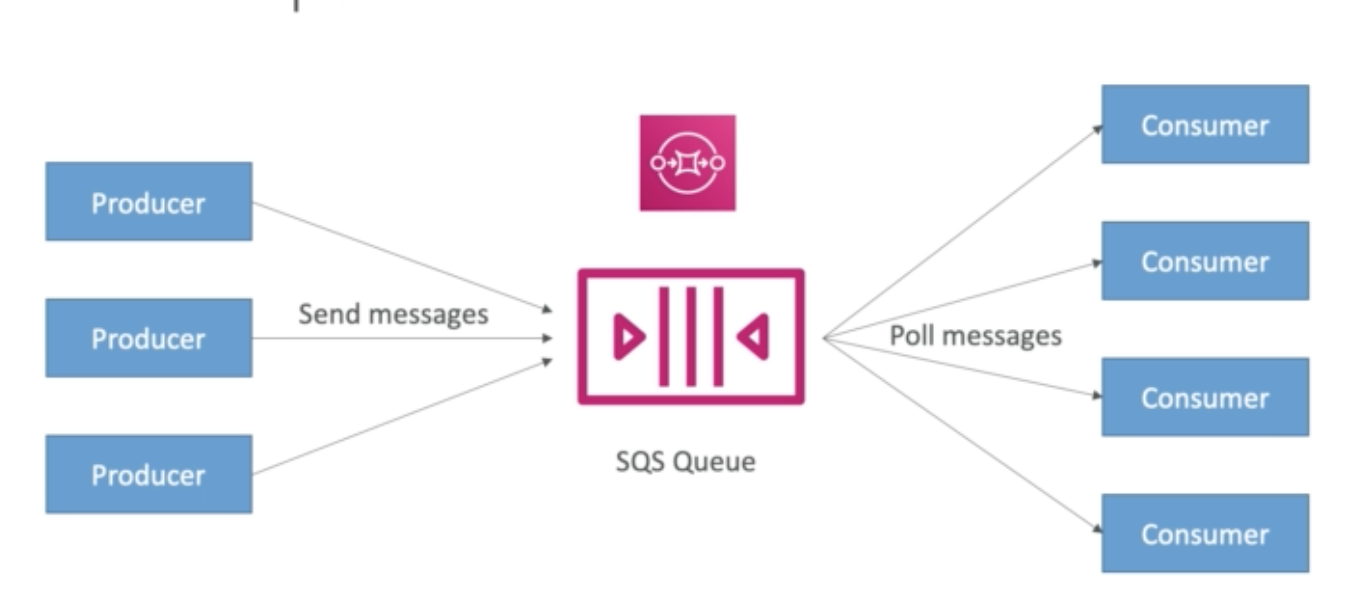

- Oldest offering
- Fully managed
- Scales from 1 message per second to 10,000 per second
- Default retention of messages: 4 days, maximum of 14 days
- NO limit to how many messages can be in the queue
- Low latency 
- horizontal scaling in terms of number of consumers
- Can have duplicate messages
- Limitation of 256 KB per message sent

- Define Body
- Add message attributes
- Provide delay delivery 

- get back
    - message identifier 
    - MD5 hash of the body

- Consuming
    - poll SQS for messages ( receive up to 10 messages at a time)
    - process the message within the visibility timeout
    - delete the message using the message ID & receeipt handle
    
    
- FIFO Queue
    - Newer offering - not available in all regions
    - name of the queue must endin .fifo
    - lower throughput (up to 3,000 per seond with batching, 300/s without)
    - Messages are processed in order by the consumer
    - Messages are sent exactly once
    - 5-minute interval de-duplication using "Duplication ID"

- SQS Extended Client
    - Message size limit is 256 KB, how to send large message?
    - USing the SQS extended client (java library)
    

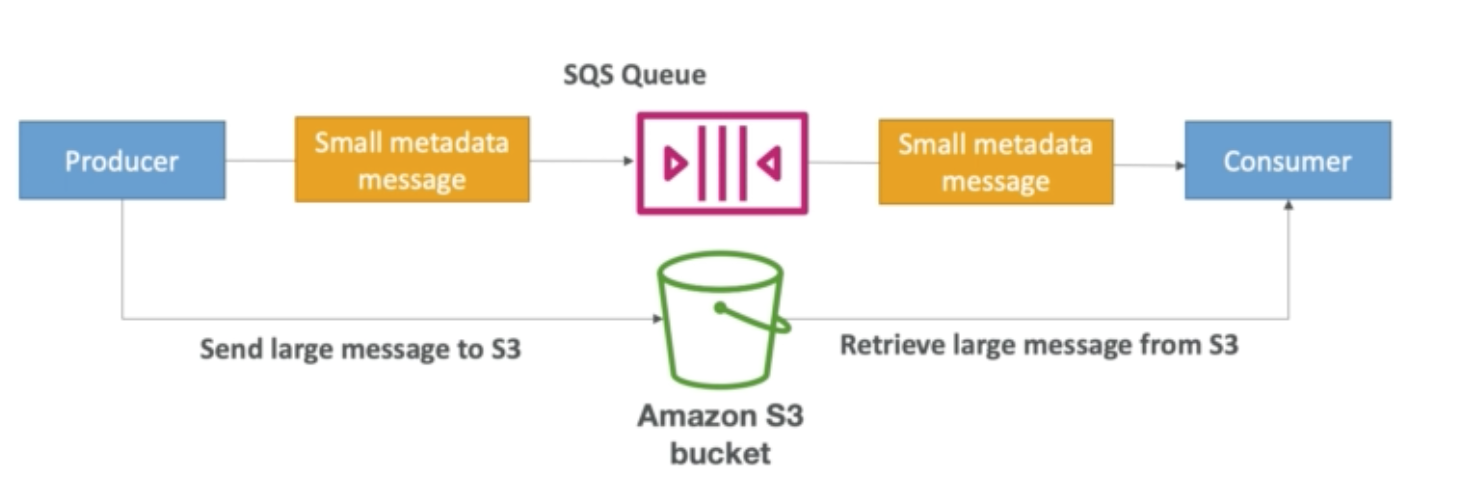

- Use Cases
    - Decouple applications
    - buffer writes to a database
    - handle large loads of message coming in
    

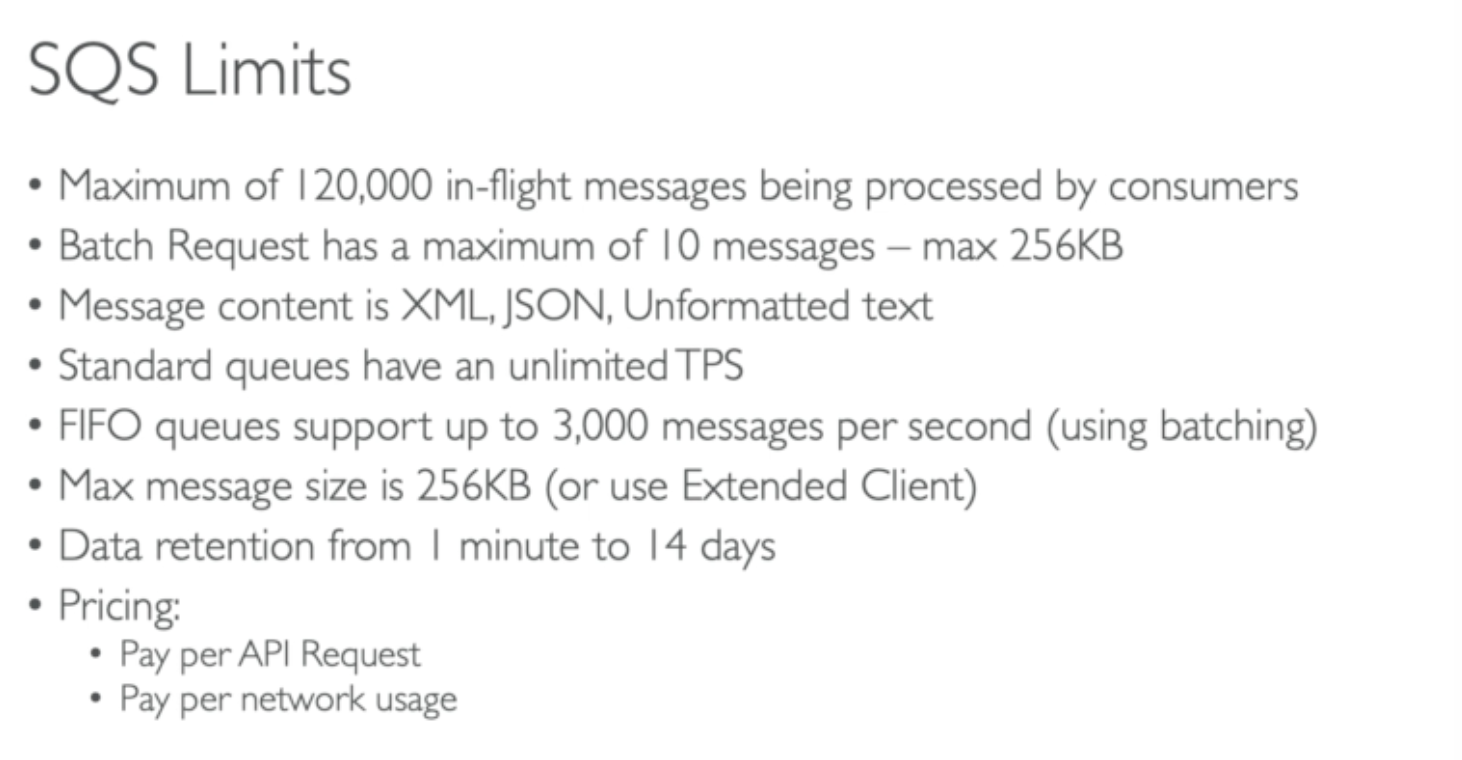

- Security 
    - Encryption in flight using the HTTPS endpoint
    - Can enable SSE using KMS
        - can set the CMK we want to use
        - SSE only encrypts the body, not the metadata
    - IAM policy must allow usage of SQS
    - SQS queue access policy
        - Finer grained control over IP
        - Control over the time the requests come in

- Kinesis Data Stream vs SQS
    - Kinesis DAta Stream
        - Data can be consumed many times
        - Data is deleted after the retention period
        - Ordering of records is preserved - even during replays 
        - Build multiple applications reading from the same stream independently
        - "Streaming MapReduce" querying capability
        - Checkpointing needed to track progress of consumption
        - Shards must be provided ahead of time
    - SQS
        - Queue, decouple applications
        - One application per queue
        - Records are deleted after consumption
        - Messages are processed independently for standard queue
        - Ordering for FIFO queues
        - Capability 
        - Dynamic scaling of load

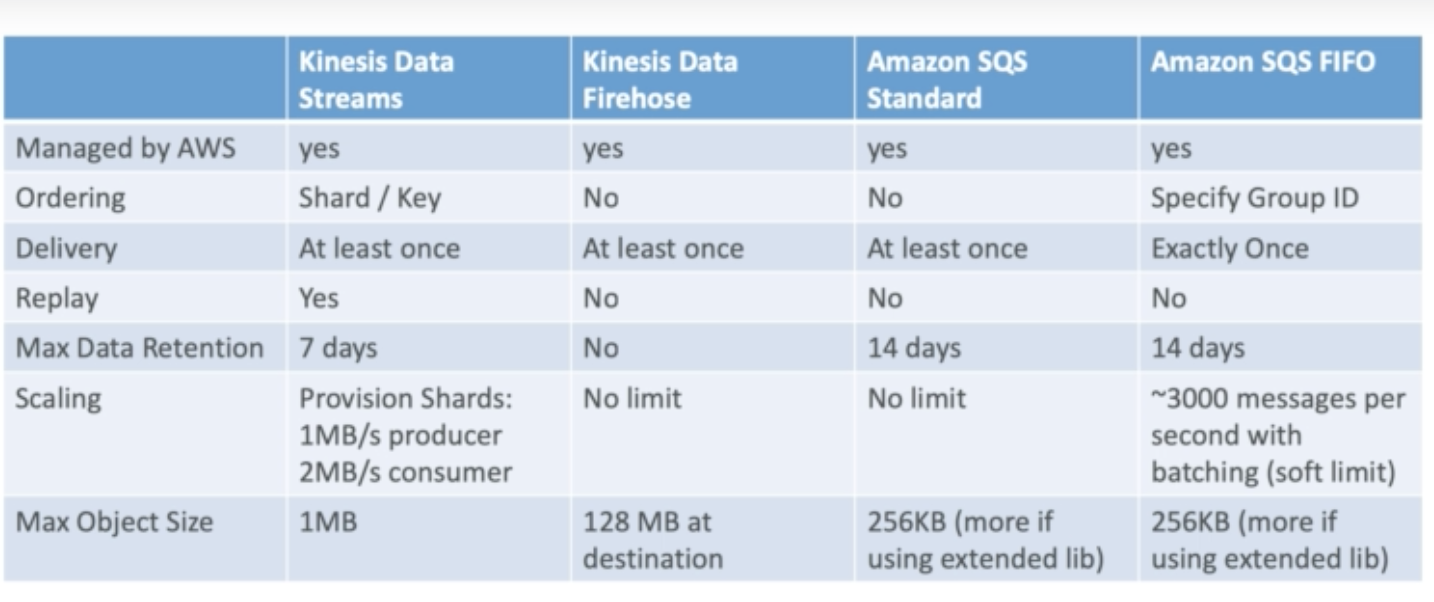

- SQS vs Kinesis : Use Cases
    - SQS
        - Order Processing
        - Image Procesing
        - Auto scaling queues according to messages
        - Buffer and Batch messages for future processing
        - Request Offloading
    - Kinesis Data Stream
        - Fast log and event data collection and processing
        - Real Time metrics and reports
        - Mobile data capture
        - Real Time data analytics
        - Gaming data feed
        - Complex stream processing
        - Data Feed from "Internet of Things"

# IoT Overview

- IoT Device Gateway
    - Serves as the entry point for IoT devices connecting to AWS
    - Allows devices to securely and efficiently communicate
    
- IoT message Broker
    - Pub / Sub messaging pattern - low latency
    - Devices can communicate with one another this way
    - Messages sent using the MQTT, WebSockets or HTTP 1.1 protocols
    - Messages are published into topics 
    - Message Broker forwards messages to all clients connected to the topic

- IoT thing Registry = IAM of IoT
    - All connected IoT devices are represented in the AWS IoT registry
    - Organized the resources associated with each device in the AWS Cloud
    - Each device gets a unique ID
    - Supports metadata for each device
    -  Can create x.509 certificate to help IoT devices connect to AWS
    - IoT Groups: group devices together and apply permissions to the group

- Authentication
    - 3 possible authentication methods for Things:
        - Create x.509 certificates and load them securely onto the Things
        - AWS SigV4
        - Custom tokens with Custom authorizers
    - For mobile apps:
        - Cognito identities
    - Web / Desktop / CLI
        - IAM
        - Federated Identities
        

- Authorization
    - AWS IoT Policies
        - Attached to x.509 certificates or Cognito identities
        - Able to revoke any device at any time
        - IoT policies are json documents
        - can be attached to groups instead of individual things
    - IMA policies
        - Attached to users, group or roles
        - Used for controlling IoT AWS APIs

- Device Shadow
- Rules Engine
    - Rules are defined on the MQTT topics
    - Rules = when it's triggered | Action = what is does
    - Rules use cases
        - Augment or filter data received from a device
        - Write data received from a device to a dynamoDB
  
- IoT Greengrass
    - IoT greengrass brings the compute layer to the device directly 
    - you can execute AWS Lambda functions on the devices 
    - Operate offline
    - deploy functions from the cloud directly to the devices

# Database Migration Service

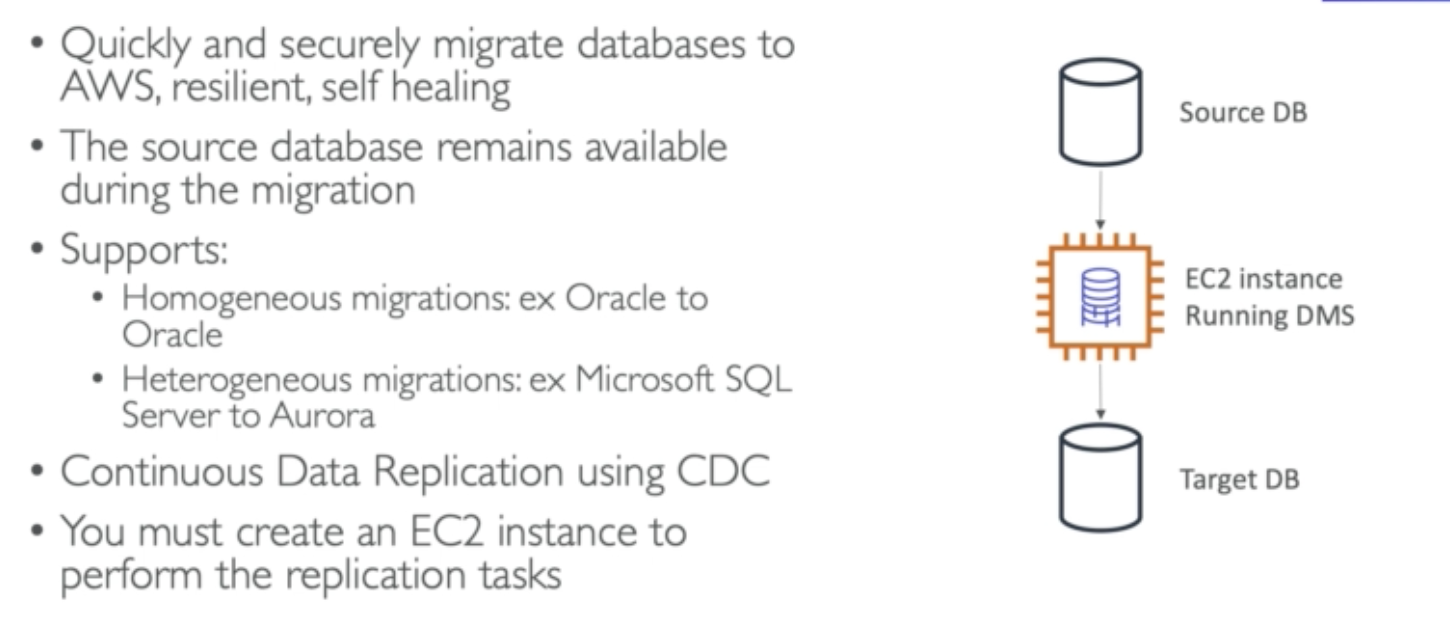

- AWS Schema conversion Tool (SCT)
    - convert your database's schema from one engine to another

# Direct Connect

- Provides a dedicated private connection from a remote network to your VPC
- Can setup multiple 1 Gbps or 10 Gbps dedicated network connections
- Setup Dedicated connection between your DC and Direct Connect locations
- You need to setup a virtual pricate gateway on your VPC
- Access public resources (S3) and private (EC2) on same connection
- Use cases:
    - Increase bandwidth throughput - working with large data sets - lower cost
    - More consistent network experience - applications using real-time data feeds
    - Hybrid Environments 
    - Enhanced security
    
- Supports both IPv4 And IPv6
- high availability: Two dc as failover or use site-to-site VPN as a failover

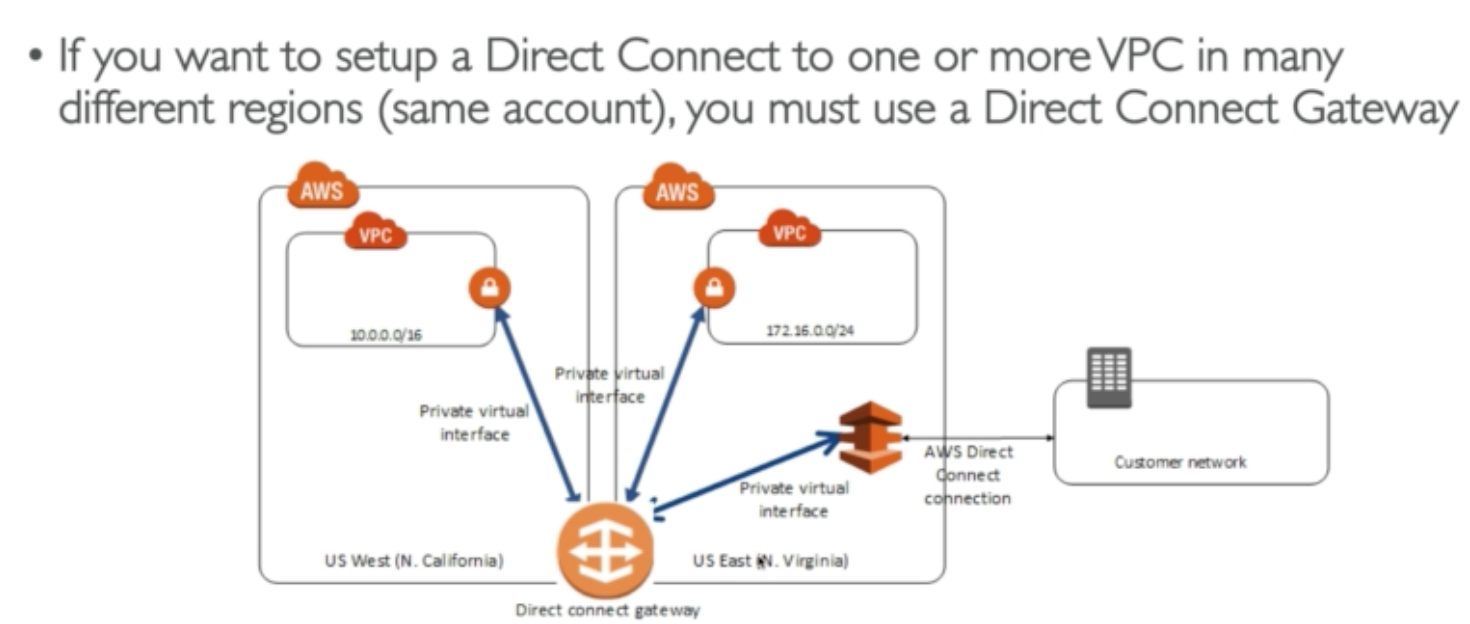

# Snowball

- Physical data transport solution that helps moving TBs or PBs of data in or out of AWS
- Altenative to moving data over the network
- Secure, tamper resistant, uses KMS 256 bit encryption
- Tracking using SNS and text messages. E-ink shipping label
- Pay per data transfer job
- Use cases: large data cloud migrations, DC decommission, use Snowball devices!

1. Request snowball devices from the AWS Console for delivery
2. Install snowball client on your servers
3. Connect the snowball to your servers and copy files using the client
4. Ship back the device when you're done
5. Data will be loaded into a S3 bucket
6. Snowball is completely wiped
7. Tracking is done using SNS, text messages and the AWS console

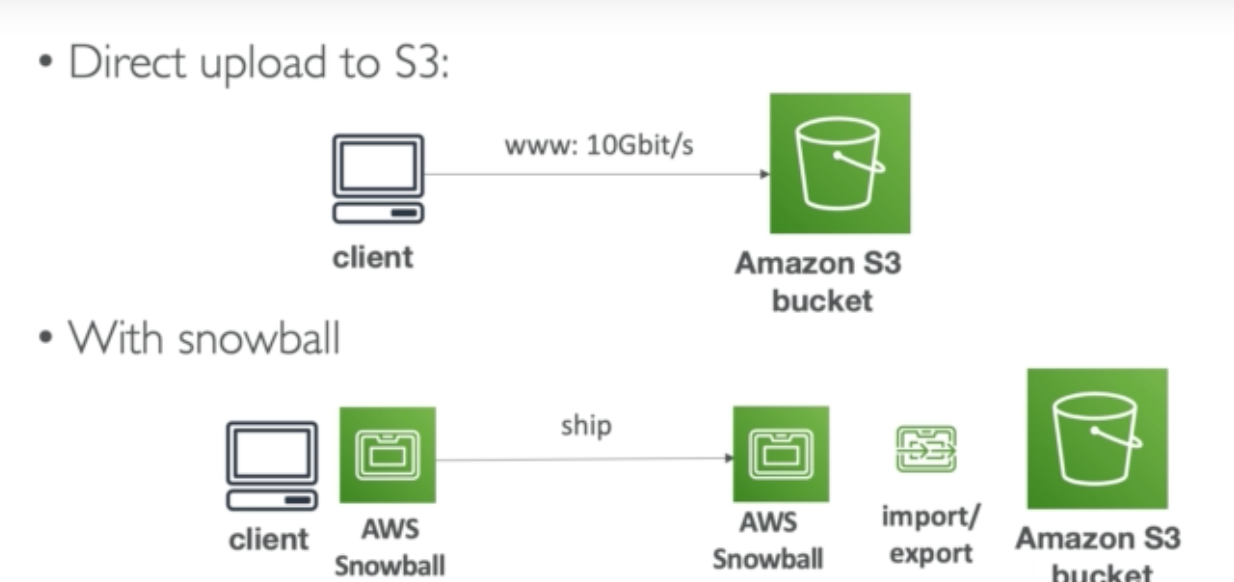

- Snowball Edge
    - Snowball edges add computational capability to the device
    - 100 TB capacity with either 
        - Storage optimized
        - Compute optimized 
    - Supports a custom EC2 AMI so you can perform processing on the go
    - Supports custom lambda functions
    - Very useful to pre-process the data while moving 
    - Use cases: Data migraiton

- AWS Snowmobile
    - Transfer exabytes of data ( 1 EB = 1,000 PB = 1,000,000 TBs)

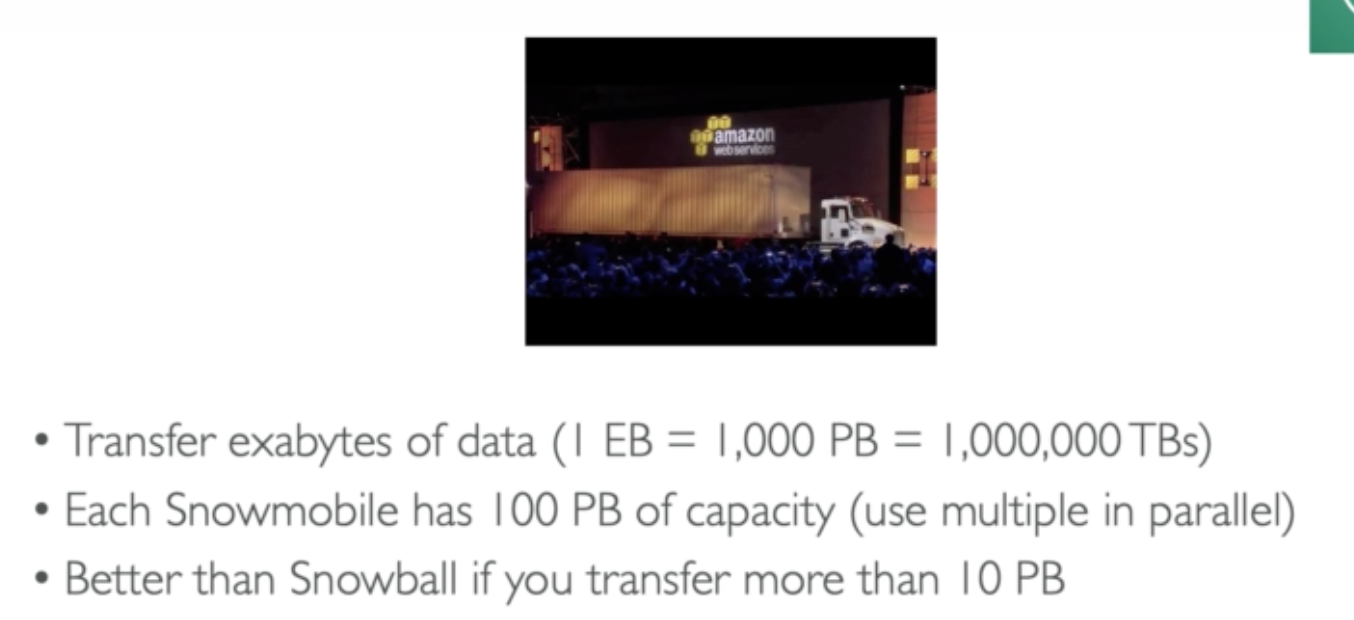

# S3

- Buckets must have a globally unique name
- Buckets are defined at the region level
- Naming convetion
    - no uppercase
    - no underscore
    - 3 - 63 characters long
    - not an ip
    - must start with lowercase letter or number

- object values are the content of the body
    - max size is 5TB
    - If uploading more than 5GB, must use multi-part upload
- Metadata (list of text key / value pairs) 

- Consistency model
    - read after write consistency for upts of new objects
        - as soon as an object is written, we can retrieve it
        - this it true, except if we did a GET before to see if the object existed (GET 404 -> PUT 200 -> GET 404)   
      
    - Eventual Consistency for deletes and puts of existing objects
        - if we read an object after updating, we might get the older version(PUT 200 -> PUT 200 -> GET 200 (might be older version))
        - If we delete an object, we might still be able to retrieve it for a short time

# S3 Storage Tiers

- S3 Standard - General Purpose
- S3 Standard - Infrequent Access (IA)
- S3 One Zone-Infrequent Access
- S3 Reduced Redundancy Storage (deprecated)
- S3 Intelligent Tiering 
- Glacier

### General Purpose
- High Durability of objects across multiple AZ
- If you store 10,000,000 objects with Amazon S3, you can on average expect to incur a loss of a single object once every 10,000 years
- Sustain 2 concurrent facility failures

#### S3 Reduced Redundacy Storage (RRS) - Deprecated
- Designed to procide 99.99 % durability 
- 99.99% availability of objects over a given year
- Designed to sustain the loss of data in a single facility


#### S3 IA
- Suitable for data that is less frequently accessed, but requires rapid access when needed
- High durability of objects across multiple AZ
- 99.9% Availability
- Low cost compared to S3 Standard
- Sustain 2 concurrent facility failures
- Use cases: As a data store for disaster recovery, backups

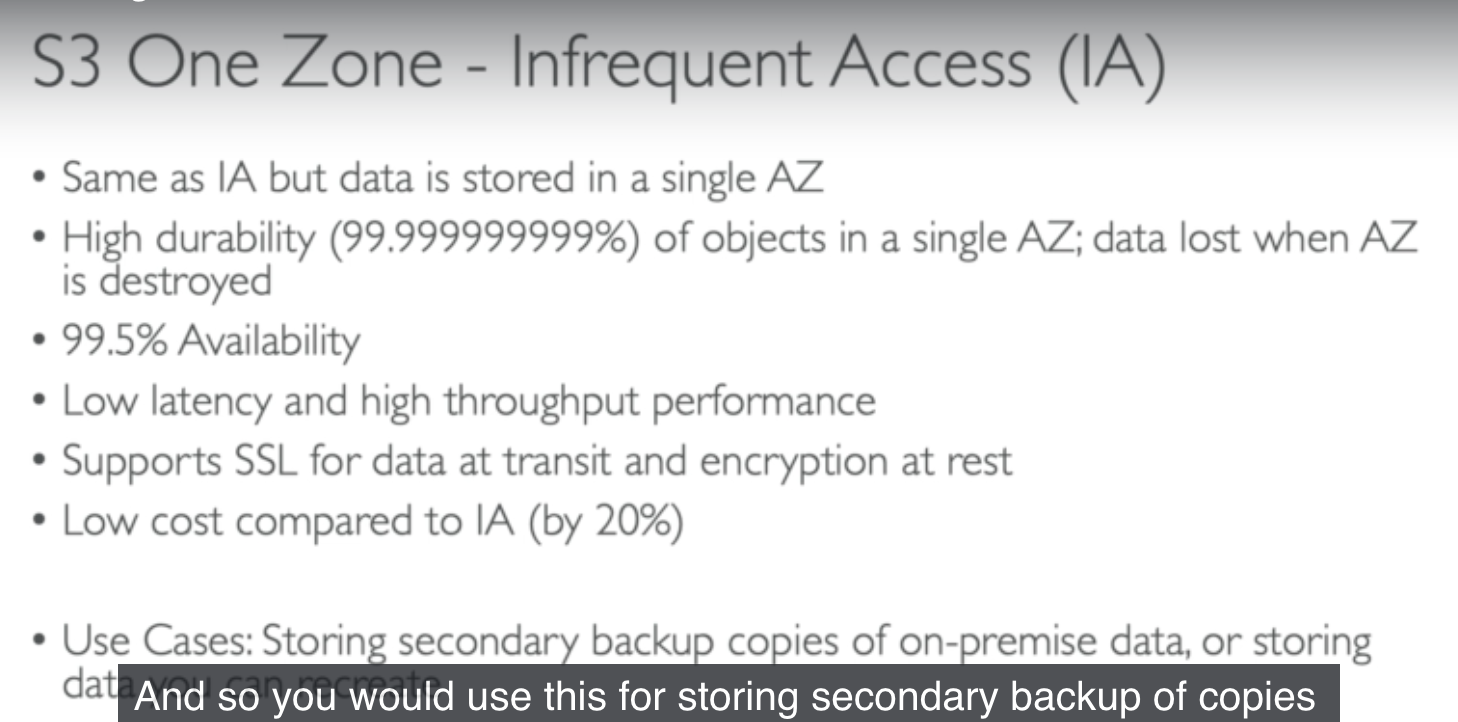

#### S3 Intelligent Tiering
- Probably not at the exam
- same low latency and high throughput performace of S3 standard
- Small monthly monitoring and auto-tiering fee
- Automaticall moves objects between two access tiers based on changing access patterns

#### S3 Glacier
- Low cost object sotrage meant for archiving / backup
- Data is retained for the longer term
- alternative to on-premise magnetic tape storage
- average annual durability is 99.9999999%
- cost per storage per month
- each item in glacier is called archive (up to 40 TB)
- archives are stored in vaults
- 3 retrieval options: 
    - expedited (1 to 5 minutes) : $ 0.03 per GB and $ 0.01 per request
    - standard (3 to 5 hours) : $ 0.01 per GB and 0.05 per 1000 requests
    - bulk (5 to 12 hours) : $ 0.0025 per GB and $ 0.025 per 1000 requests

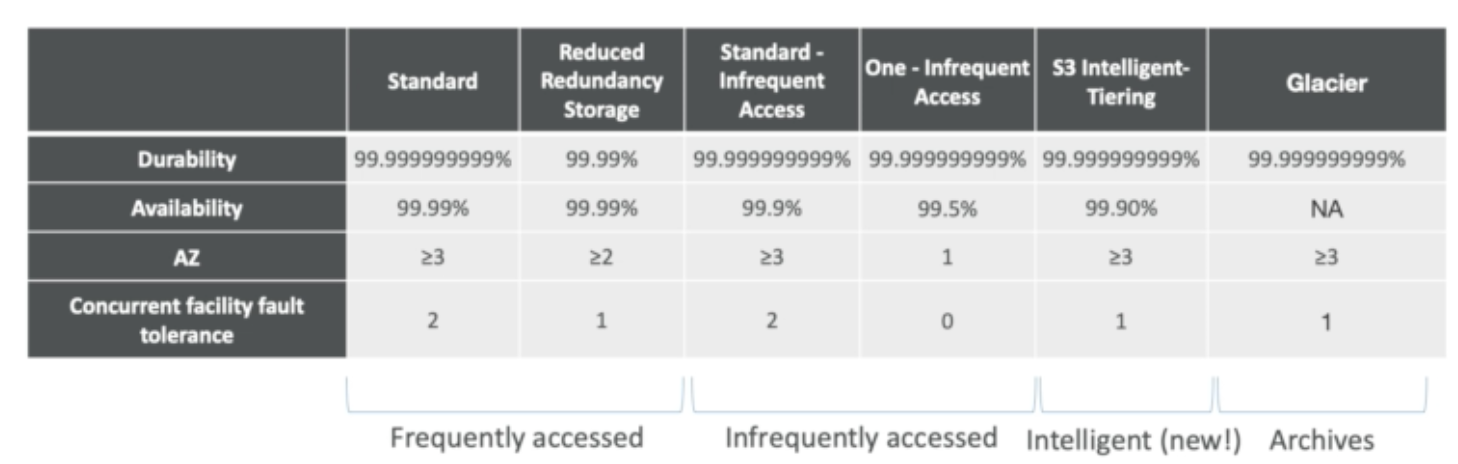

# S3 Lifecycle Rules

- Set of rules to move data between different tiers, to save storage cost
- Example : General purpose => IA => Glaciers

- Transition actions: it defines when objects are transitioned to another storage class. Eg: we can choose to move objects to Standard IA class 60 days after you created them or can move to Glacier for archiving after 6 months
- EXpiration actions : helps to configure objects to expire after a certain time period. S3 deletes expired objects on our behalf Eg: Access log files can be set to delete after a specified period of time

- moving to glacier is helpful for backup / long term